# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

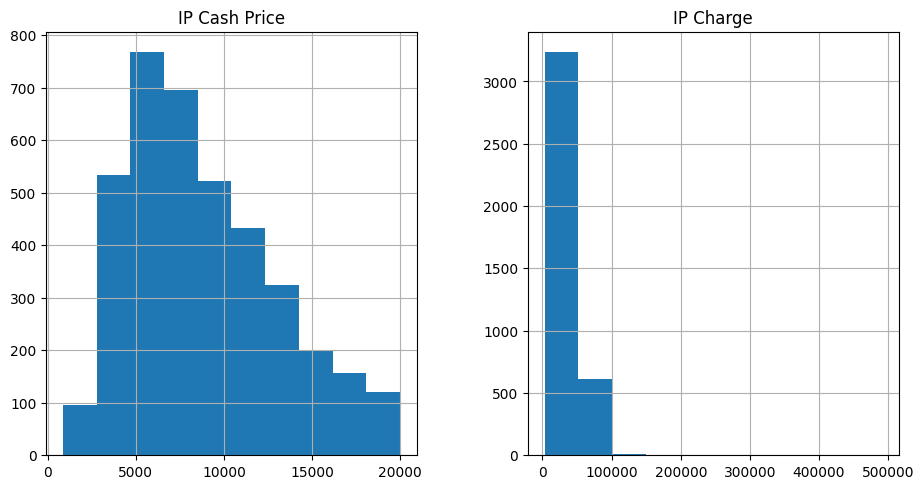

In [5]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

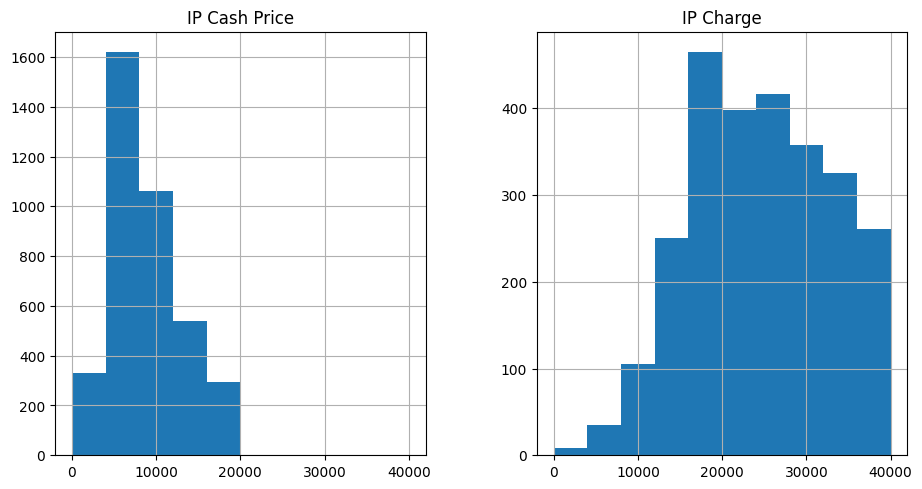

In [6]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [7]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

Pandas was used for data manipulation, and matplotlib.pyplot was used for data display. The code loads an Excel dataset into a DataFrame from an AWS S3 URL link. The dataset, which has 3,864 rows and 19 columns, is about medical operations. It includes detailed information on process descriptions, payer information, and various costs and reimbursements.

Histplot 1.  
The majority of medical services are priced between 0 and 10,000. Such services become less common as prices rise. While routine check-ups are common, more specialized and costly procedures, such as some surgeries, are less common.

Histplot 2.

When we look at all of the charges, we see that several are around the 100,000 mark. When we zoom into the 0 to 40,000 range, however, we find a substantial peak in the 10,000 to 20,000 area. This implies that treatments priced between $10,000 and 20,000 are relatively typical within this range.

Both graphs are inclined to the right, indicating that higher charges are rare. The second graph has more ups and downs, implying a wide range of pricing.




---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

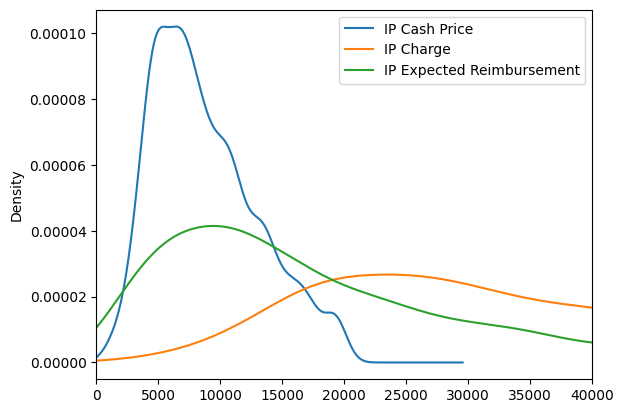

In [8]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

Distribution of IP Cash Price, IP Charge, and IP Expected Reimbursement


(Blue Line) IP Cash Price:

The amount you would pay if you didn't have any insurance.

conclusion:- The majority of these expenses are on the lower end of the range, indicating that when people pay out-of-pocket, they frequently experience reduced pricing, potentially to make medical services more accessible to them.



 IP Charge(Green Line):

The maximum amount chargeable to insurance companies.
conclusion: the overall amount is typically much greater, implying that hospitals establish higher baseline pricing when dealing with insurance companies, probably because insurance firms can afford to pay more than individual customers.


IP Expected Reimbursement  (Orange Line):

The anticipated reimbursement from insurance companies.
conclusion: This line tends to fall between the other two, illustrating that while hospitals may bill a high amount to insurance companies, they realistically expect to collect a lower amount usually more than the cash price.



The plot reflects hospitals' strategy  between increasing money while providing accessibility to services. While they charge insurance firms with higher prices, they also expect these companies to negotiate for lower rates. At the same time, hospitals also offer more affordable charges for individuals who do not have insurance, maybe to ensure that care is available to all.















---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [9]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

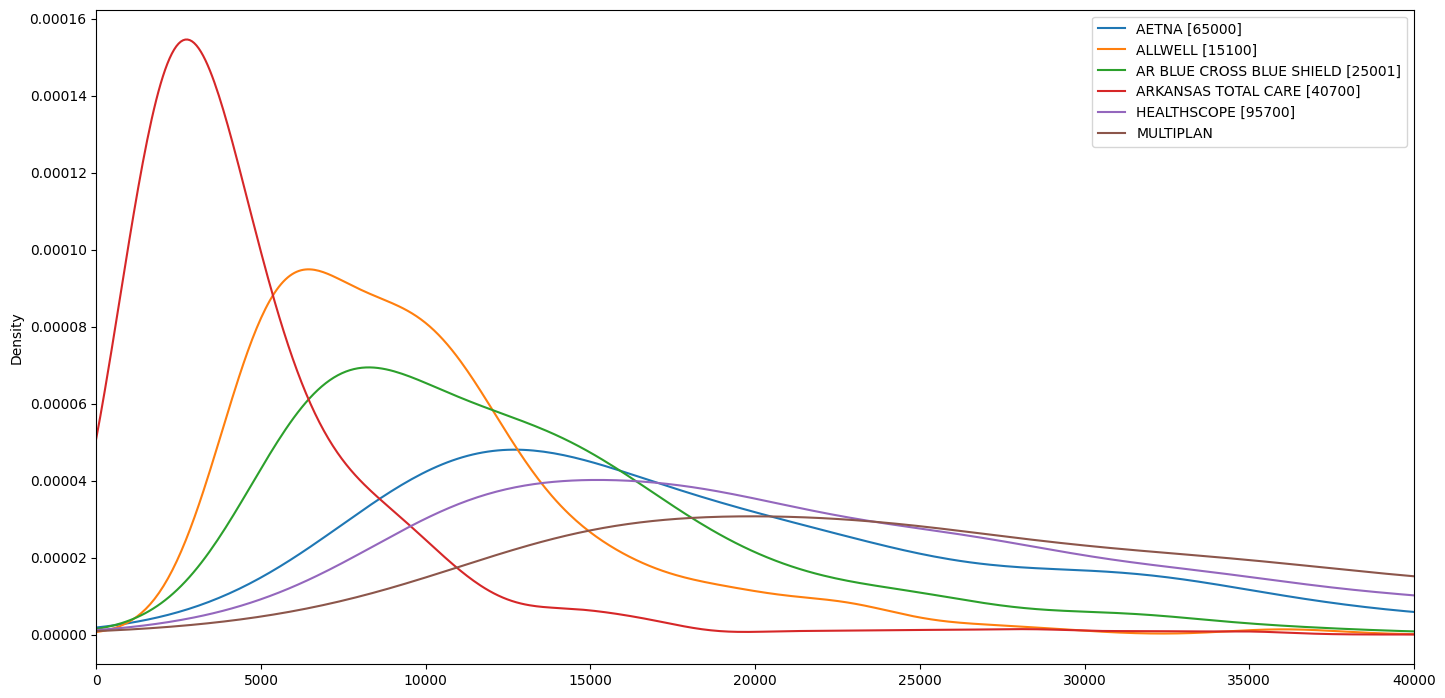

In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


Observation :-
AETNA and HEALTHSCOPE have a high peak at the lower end of the price range, indicating that these plans place a strong emphasis on lower-cost services. The long curve of HEALTHSCOPE, on the other hand, may reflect a slightly larger coverage of higher-priced services.

The peak around the $10,000 price range for AR BLUE CROSS BLUE SHIELD indicates that the plan tends to reimburse for mid-tier priced procedures. This implies a more balanced approach to healthcare coverage.

The more even curve of ARKANSAS TOTAL CARE, with a mild peak around the $15,000 price range, reflects a broad range of reimbursements, indicating that this plan covers a large range of services.

MULTIPLAN's flat curve shows a diverse product with no clear emphasis on any particular price range. Individuals who require a combination of basic and specialist services may benefit from this.

Both AETNA and ALLWELL  plans appear to focus on lower-cost services, possibly targeting a segment of the population that requires basic healthcare services or is price-sensitive.


Interpretation:- Based on the KDE plot patterns, each plan provides distinct benefits customized to different healthcare demands and financial capacities. AETNA and HEALTHSCOPE generally serve those who prefer basic healthcare, making them suited for those on a tight budget; however, HEALTHSCOPE may give slightly broader coverage for more expensive therapies. AR BLUE CROSS BLUE SHIELD takes a balanced approach, available to people wanting both routine and specialty treatment while maintaining a reasonable service cost. ARKANSAS TOTAL CARE appears to be meant for those seeking complete healthcare coverage across a wide range of services, maybe at a premium, based on its wide range of reimbursement rates.













---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

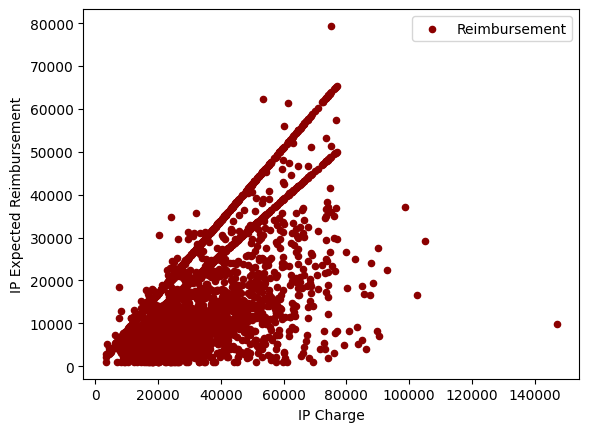

In [12]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-13-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


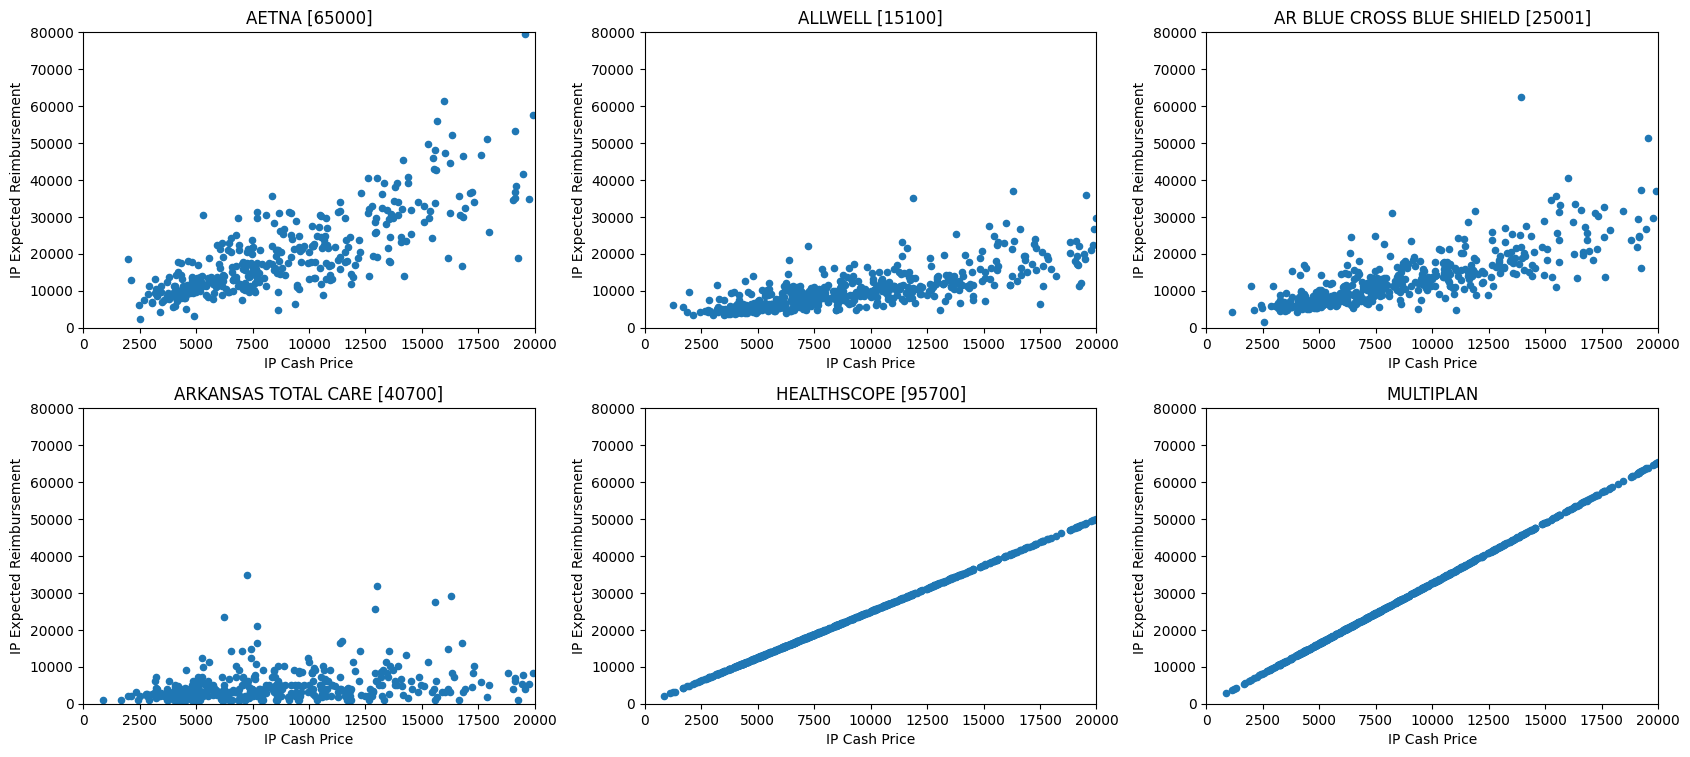

In [13]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

The graphs compare the individual expenses of medical care with what hospitals believe insurance companies will cover. Many services are less expensive with AETNA, although insurance payouts vary greatly. ALLWELL's costs and insurance payouts are unpredictable, with no visible pattern. Although AR BLUE CROSS has limited data, several of its services are less expensive. ARKANSAS TOTAL CARE provides many low-cost services; however, as prices rise, the predicted insurance payout becomes less predictable. HEALTHSCOPE and MULTIPLAN are more clear: they expect the insurance company to cover more when the cost of the service rises. In summary, each insurance company approaches medical expenditures differently.





---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv ('insurance_data.csv')
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


from matplotlib import pyplot as plt
insurance['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
insurance.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
insurance.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
insurance.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
insurance['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
insurance['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
insurance['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
insurance['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in insurance.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in insurance.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(insurance['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='age', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(insurance['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='age', y='smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(insurance['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='age', y='region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(insurance['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance, x='bmi', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

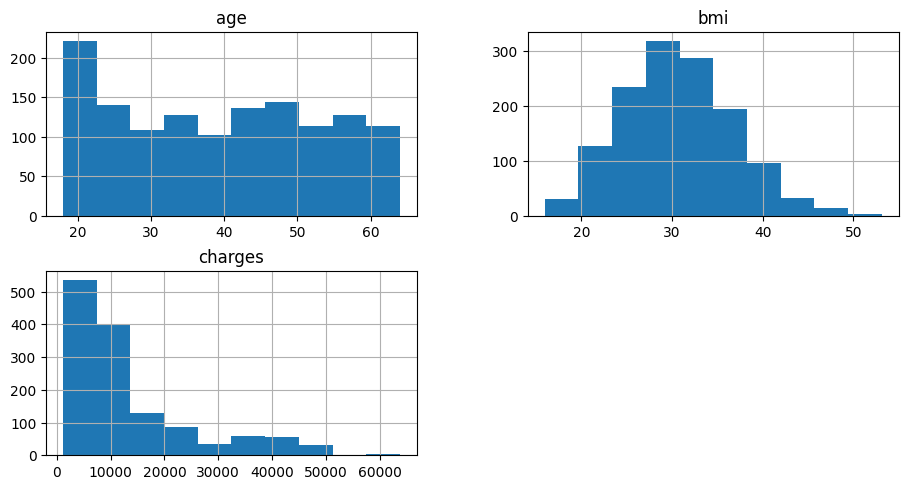

In [15]:
insurance[['age', 'bmi', 'region', 'charges']].hist(figsize=(11,5.5))
plt.show()

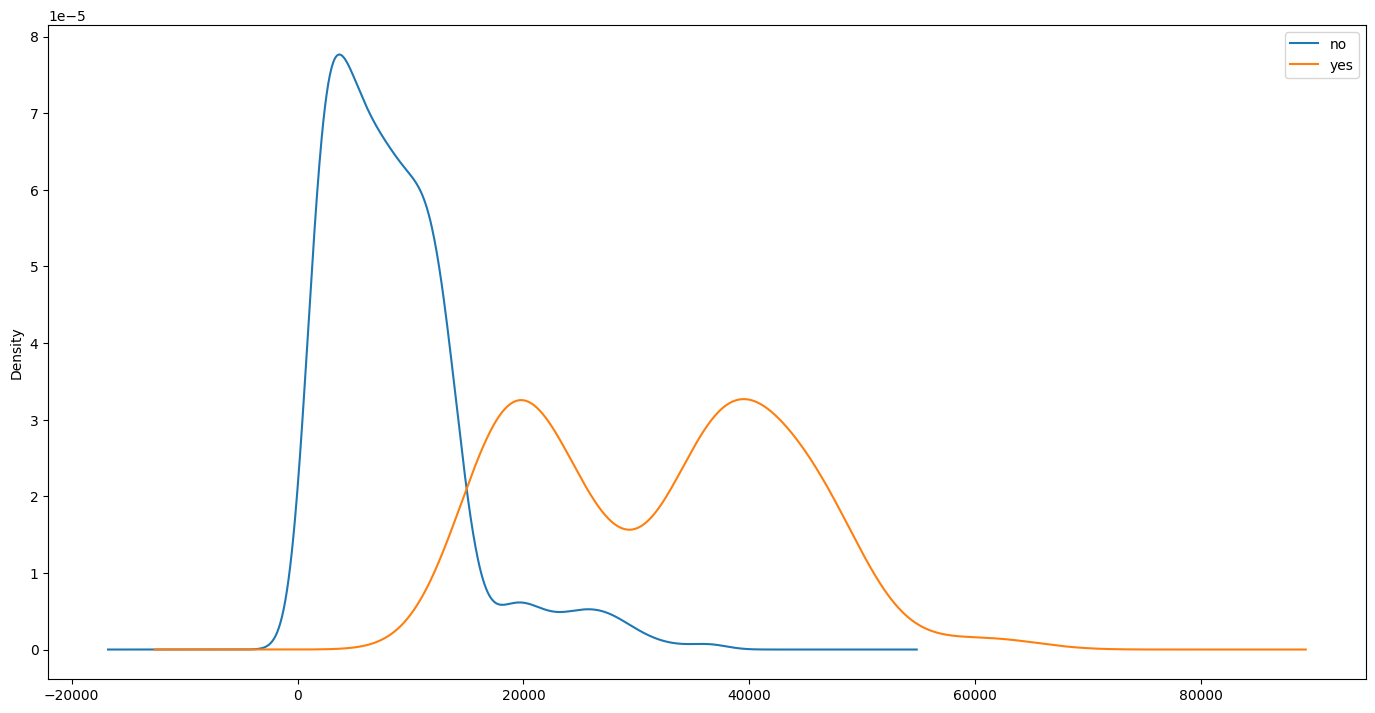

In [16]:
insurance.groupby(['smoker'])['charges'].plot.kde(
    legend=True,
    figsize=(17,8.5)
)
plt.xlim
plt.show()

### Observations #1
According to Histplot,The majority of insured people are under the age of 20, showing a considerably younger age group in the dataset.
The number of insured people has decreased significantly between the ages of 20 and 30 and 50 and 60. However, there are spikes or rises in the number of people with insurance in their 40s and near 60s.
For BMI,majority of insured people have a BMI of 25 to 35, which puts them in the overweight category.
Fewer people are classified as underweight or very obese.
The distribution is very much to the right, indicating that there are fewer people with very high insurance charges than those with low to medium charges.

The KDE plot compares the cost of insurance for smokers versus nonsmokers. Nonsmokers (blue line) have lower charges that peak at the left. Smokers (orange line) have a larger variety of prices, with some paying significantly more than non-smokers. Smoking appears to be associated with increased insurance premiums.

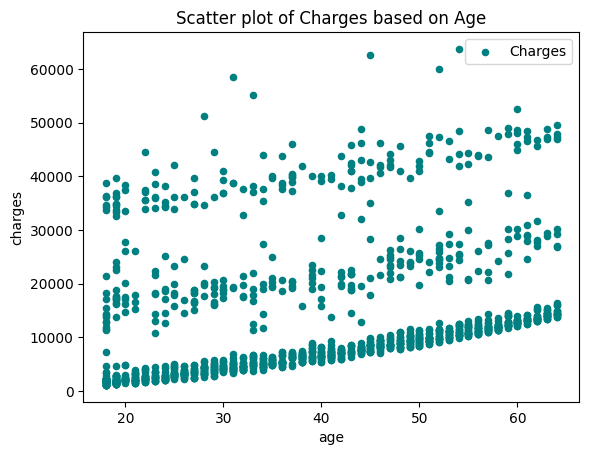

In [17]:
insurance.plot.scatter(x='age', y='charges', color='teal', label='Charges')
plt.title('Scatter plot of Charges based on Age')
plt.show()

<ipython-input-18-ecaa5ac317a2>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (smoking_status, values) in enumerate(groups):


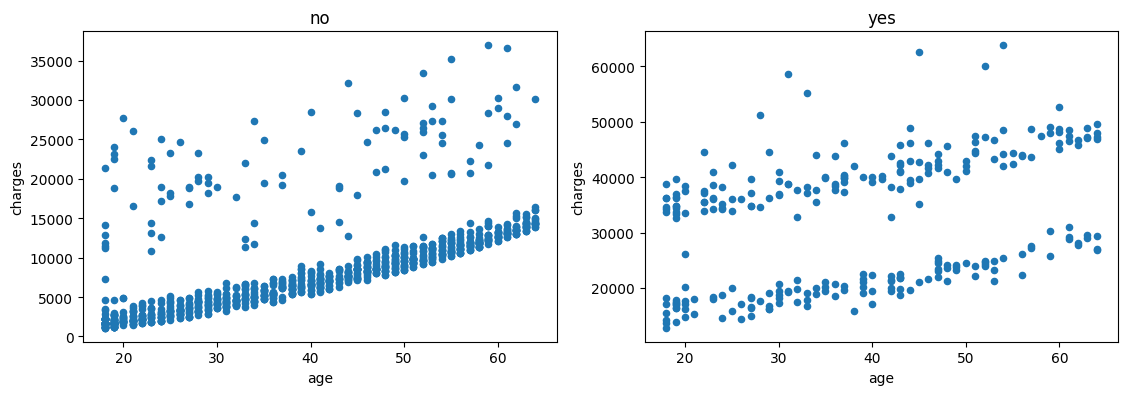

In [18]:
groups = insurance.groupby(['smoker'])
plt.figure(figsize=(17,11))

for i, (smoking_status, values) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    values.plot.scatter(x='age', y='charges', ax=ax)
    ax.set_title(smoking_status)

plt.tight_layout()
plt.show()

### Observations #2

These scatter plots demonstrate the association between age and insurance charges, separated by smoking status.

(Non-smokers "no"): For those who do not smoke:
Charges for nonsmokers are often lower.
There is a minor increase in charges as one gets older.

Right Plot (Smokers "Yes"): For smokers:
There is a broader range of prices, but they are often greater than for nonsmokers.
Although age has an effect, it is less constant than in nonsmokers.




---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option